# Scattering phases for the step potential

In [1]:
from _ham import Hamiltonian
import numpy as np

In [2]:
def theta(x):
    return 0.5 * (np.sign(x) + 1)

def step_potential(v_zero,w, x):
    return v_zero * theta(w - np.abs(x))


In [3]:
# Inititalize Hamiltonian
length = 30
steps = 501
v_zero = 3
w = 1
ham_step = Hamiltonian(length, steps)
ham_step.build_hamiltonian(lambda x: step_potential(v_zero,w, x))

In [4]:
ham_step.diagonalize()


In [5]:
delta_neg, delta_pos, kvals_neg, kvals_pos = ham_step.calc_scatter_phases()

   


# Results

## Scatter phases obtained by numerical solution, analytic solution, and Born approximation

In [8]:
# Born approximation can be calculated analytically for step potential
k_start = 1e-10
k_end = 10
steps = 100000
k_vals = np.linspace(k_start, k_end, steps)

k_prime = np.sqrt(k_vals ** 2 - 2 * v_zero + 0j)
C_plus = np.exp(-2 * np.complex(1j) * k_vals * w) * (k_vals + np.complex(1j) * 
        k_prime * np.tan(k_prime * w)) / (
        k_vals - np.complex(1j) * k_prime * np.tan(k_prime * w))
C_minus = -np.exp(-2 * np.complex(1j) * k_vals * w) * (
        k_vals - np.complex(1j) * k_prime * np.tan(k_prime * w) ** (-1)) / (
                  k_vals + np.complex(1j) * k_prime * np.tan(k_prime * w) ** (-1))

delta_pos_ana = -np.log(C_plus) / 2 * np.complex(1j)
delta_neg_ana = -np.log(C_minus) / 2 * np.complex(1j)

delta_neg_born = -v_zero * w / k_vals * (1 - np.sin(2 * k_vals * w) / 2 / k_vals / w)
delta_pos_born = -v_zero * w / k_vals * (1 + np.sin(2 * k_vals * w) / 2 / k_vals / w)


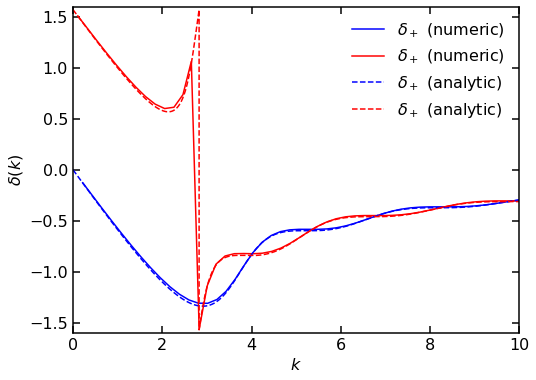

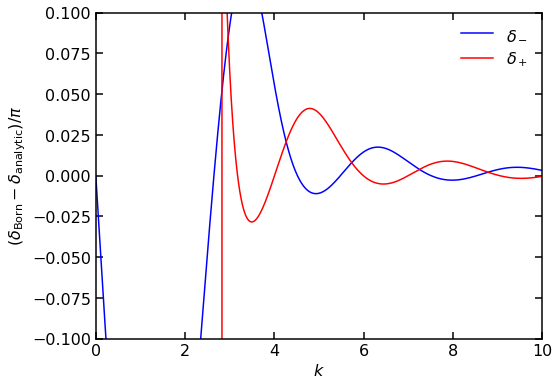

In [9]:
import matplotlib.pyplot as plt
plt.style.use('scientific.mplstyle')
plt.figure(figsize=(8,6))
# Analytic vs. numeric solution
plt.figure(1)
plt.plot(np.real(kvals_neg), np.real(delta_neg),  color='blue', label='$\delta_+$ (numeric)')
plt.plot(np.real(kvals_pos), np.real(delta_pos), color='red', label='$\delta_+$ (numeric)')
plt.plot(np.real(k_vals), np.real(delta_neg_ana),  color='blue',linestyle='dashed', label='$\delta_+$ (analytic)')
plt.plot(np.real(k_vals), np.real(delta_pos_ana), color='red',linestyle='dashed', label='$\delta_+$ (analytic)')
plt.xlim((0, 10))
plt.ylim((-1.6, 1.6))
plt.xlabel('$k$'), plt.ylabel('$\delta(k)$')
plt.legend()

# Analytic solution vs. Born approximation 
plt.figure(figsize=(8,6))
plt.plot(k_vals, (delta_neg_born - np.real(delta_neg_ana)) / np.pi, color='blue', label='$\delta_-$')
plt.plot(k_vals, (delta_pos_born - np.real(delta_pos_ana)) / np.pi, color='red', label='$\delta_+$')
plt.xlabel('$k$'), plt.ylabel('($\delta_\mathrm{Born}-\delta_\mathrm{analytic})/\pi$')
plt.xlim((0, 10))
plt.ylim((-0.1, 0.1))
plt.legend()